### Filters

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft, fftfreq

In [101]:
def sine(f, t, a=1):
    return a * np.sin((2 * np.pi * f ) * t)


def mixed_sine(freqs, time):
    sig = np.zeros((len(freqs), len(time)))
    for i, freq in enumerate(freqs):
        sig[i, :] = sine(f=freq, t=time, a=np.random.randint(1, 10))
    return np.sum(sig, 0)


def fourier(sig, fs, n=None):
    if n is None:
        n = len(sig)
    sigX = fft(sig, n)
    sigX = sigX / n
    f = fftfreq(n, 1/fs)
    return sigX[f >= 0], f[f >= 0]

In [102]:
t_min = 0
t_max = 10
fs = 1000

t = np.arange(t_min, t_max, 1/fs)

In [184]:
freqs = [1, 2, 3, 4,4.5, 5, 15, 50, 60, 80, 100]

sig = mixed_sine(freqs, t)
sigX, freqs = fourier(sig, fs)


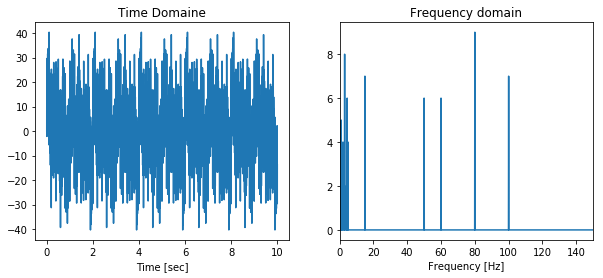

In [185]:
f, a  = plt.subplots(1, 2, figsize=(10, 4))


a[0].plot(t, sig)
a[0].set_title('Time Domaine')
a[0].set_xlabel('Time [sec]')
a[1].plot(freqs, 2 * np.abs(sigX))
a[1].set_xlim([0, 150])
a[1].set_title('Frequency domain')
a[1].set_xlabel('Frequency [Hz]')
plt.show()

In [190]:
# band pass 2 - 20

transition_zone = 0.1
cut_offs = [2, 20]

nyq = fs / 2
freqs = np.array([0, cut_offs[0] - (cut_offs[0] * transition_zone), cut_offs[0], cut_offs[1], cut_offs[1] + (cut_offs[1] * transition_zone), nyq])
freqs *= (1 / nyq)
ideal = [0, 0, 1, 1, 0, 0]

order = np.round(4 *  fs/ (cut_offs[0])) + 1

kernel = signal.firls(order, freqs, ideal)
kX, kf = fourier(kernel, fs)

Text(0.5,0,'Frequency [Hz]')

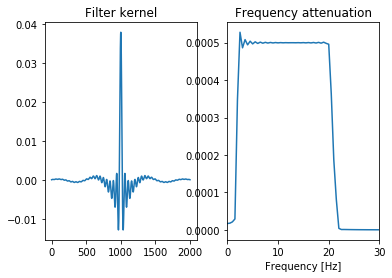

In [187]:
f, a = plt.subplots(1, 2)

a[0].plot(kernel)
a[0].set_title('Filter kernel')
a[1].plot(kf, np.abs(kX))
a[1].set_xlim([0, 30])
a[1].set_title('Frequency attenuation')
a[1].set_xlabel('Frequency [Hz]')

In [188]:
filtered = signal.filtfilt(kernel, 1, sig)

filteredX, filtered_f = fourier(filtered, fs)
sigX, freqs = fourier(sig, fs)

/home/ruairi/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/ruairi/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/ruairi/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be inter

(0, 120)

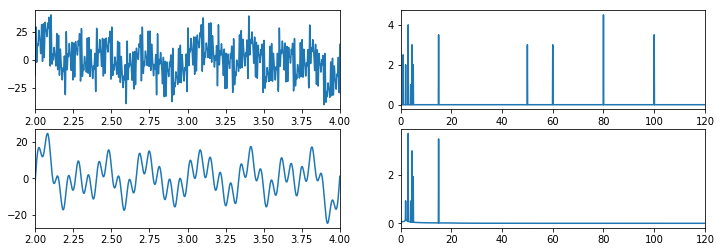

In [189]:
f, a = plt.subplots(2, 2, figsize=(12, 4))

a[0, 0].plot(t, sig)
a[0, 0].set_xlim([2, 4])
a[1, 0].plot(t, filtered)
a[1, 0].set_xlim([2, 4])

a[0, 1].plot(freqs, np.abs(sigX))
a[0, 1].set_xlim([0, 120])
a[1, 1].plot(filtered_f, np.abs(filteredX))
a[1, 1].set_xlim([0, 120])